<a href="https://www.kaggle.com/code/notsau/cnn-with-cifar-10?scriptVersionId=161449871" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Datayı Yükleme ve Tanıma

In [1]:
from tensorflow.keras.datasets import cifar10
#resim datasını yükledik

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#x_train ve x_test, eğitim ve test veri setlerindeki görüntülerdir. Bu görüntüler, 32x32 piksel boyutunda renkli (RGB) görüntülerdir.
#y_train ve y_test, eğitim ve test veri setlerindeki etiketlerdir. Her bir etiket, görüntünün hangi sınıfa ait olduğunu belirtir. CIFAR-10 veri kümesinde 10 farklı sınıf bulunur.

In [3]:
y_train[1]

array([9], dtype=uint8)

In [4]:
x_test.shape
#10000 tane test resmi vaar

(10000, 32, 32, 3)

In [5]:
x_train.shape
#50000 tane eğitim resmi var

(50000, 32, 32, 3)

### Datayı Görselleştirme

In [6]:
import matplotlib.pyplot as plt
#resimleri görmek için matplotlib yükledik

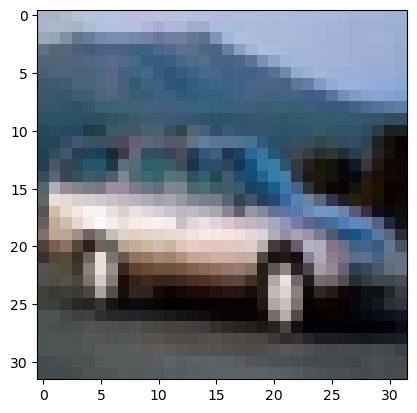

In [7]:
plt.imshow(x_train[4],cmap="gray")
#5. resim bir araba resmi bunu alttaki koddan da görebiliriz

In [8]:
y_train[4]
#çıktıda array[1] yazıyor yani 2. grupta 3. satırdaki kodda 2. grupta araba yazdığını görebiliriz.

array([1], dtype=uint8)

In [9]:
x_train[0]
#ilk resmin kodu gördüğünüz gibi 0-255 arası kodlar var

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

### Normalize Etme

In [10]:
x_train=x_train/255.0
x_test=x_test/255.0
#verimizi 255'e bölersek 0-1 arasında kodlar olmuş olacak yani normalize etmiş olacağız.

## Deep Learning

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,InputLayer,Reshape,MaxPooling2D,Flatten
#Dense: büyün layer(nöronların) birbirine bağlı olmasını söylüyor
#Conv2D: CNN; resim tanıma modeli
#InputLayer: Resmin bi boyutunun olduğu
#Reshape: boyutun içinde 1 rakam olduğu
#MaxPooling2D: resmin boyutunu küçülte küçülte rakama dönüştürmek için
#flatten: rakamları tek bi sütun haline(diziye) çeviriyor

In [19]:
# Model oluşturma
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Modeli derleme
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.fit(x_train,y_train,epochs=150,batch_size=512,validation_split=.20,verbose=1)

Epoch 1/150

79/79 [==============================] - 7s 91ms/step - loss: 1.2106 - accuracy: 0.5511 - val_loss: 1.2216 - val_accuracy: 0.5455

Epoch 2/150

79/79 [==============================] - 8s 97ms/step - loss: 1.1822 - accuracy: 0.5631 - val_loss: 1.2335 - val_accuracy: 0.5431

Epoch 3/150

79/79 [==============================] - 8s 104ms/step - loss: 1.1489 - accuracy: 0.5762 - val_loss: 1.1834 - val_accuracy: 0.5613

Epoch 4/150

79/79 [==============================] - 9s 118ms/step - loss: 1.1290 - accuracy: 0.5813 - val_loss: 1.1739 - val_accuracy: 0.5733

Epoch 5/150

79/79 [==============================] - 8s 105ms/step - loss: 1.0978 - accuracy: 0.5963 - val_loss: 1.1844 - val_accuracy: 0.5759

Epoch 6/150

79/79 [==============================] - 8s 99ms/step - loss: 1.0791 - accuracy: 0.6019 - val_loss: 1.1347 - val_accuracy: 0.5859

Epoch 7/150

79/79 [==============================] - 7s 93ms/step - loss: 1.0556 - accuracy: 0.6121 - val_loss: 1.1514 - val_accurac

In [22]:
loss,accuracy=model.evaluate(x_test,y_test)
#loss yerine _ yazarsak loss'u görmezden gelip sadece accuracy'i yapar

313/313 [==============================] - 1s 3ms/step - loss: 2.8246 - accuracy: 0.6087


In [23]:
accuracy

0.6086999773979187

In [24]:
loss

2.8246383666992188